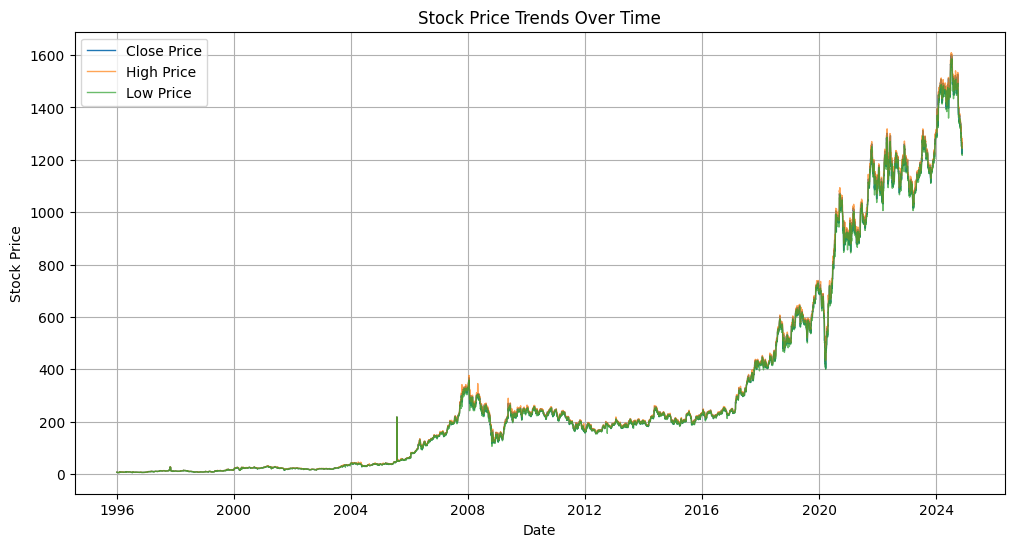

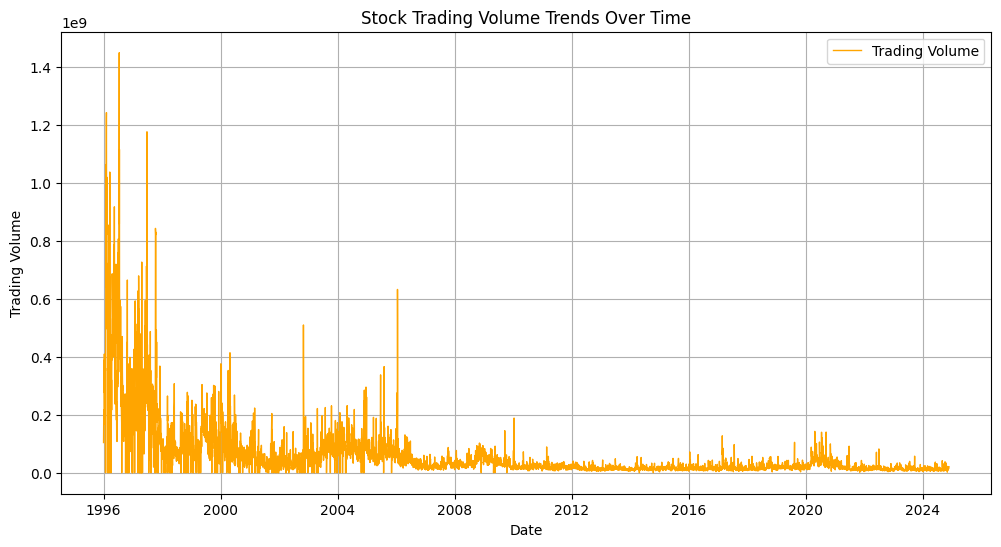

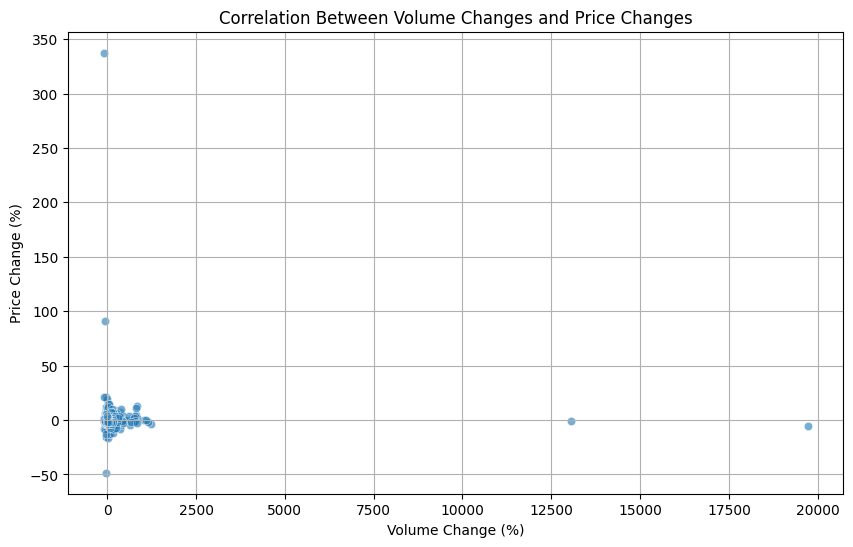

Correlation Coefficient: -0.010093866804992708


In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = 'nse/RELIANCE.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Check for missing values and data types
print(data.info())
print(data.describe())

# Convert 'Date' to datetime if not already
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Plot stock price trends
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', linewidth=2)
plt.plot(data['Date'], data['High'], label='High Price', alpha=0.7)
plt.plot(data['Date'], data['Low'], label='Low Price', alpha=0.7)
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot stock trading volume trends
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Trading Volume', color='orange', linewidth=2)
plt.title('Stock Trading Volume Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage change for price and volume
data['Price_Change'] = data['Close'].pct_change() * 100
data['Volume_Change'] = data['Volume'].pct_change() * 100

# Plot the distribution of price and volume changes
plt.figure(figsize=(12, 6))
sns.histplot(data['Price_Change'].dropna(), kde=True, color='blue', label='Price Change %')
sns.histplot(data['Volume_Change'].dropna(), kde=True, color='red', alpha=0.6, label='Volume Change %')
plt.title('Distribution of Price and Volume Changes')
plt.legend()
plt.grid(True)
plt.show()

# Correlation analysis
correlation_data = data[['Price_Change', 'Volume_Change']].dropna()
sns.jointplot(x=correlation_data['Volume_Change'], y=correlation_data['Price_Change'], kind='scatter')
plt.show()

correlation_coefficient = correlation_data.corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

# Identify unusual trading volumes using z-score
data['Volume_Zscore'] = zscore(data['Volume'])
unusual_volume_threshold = 3
unusual_volume = data[data['Volume_Zscore'].abs() > unusual_volume_threshold]
print(f'Unusual Volume Days: {unusual_volume}')

# Analyze high-volume price spikes
high_volume_price_spikes = unusual_volume[['Date', 'Close', 'High', 'Low', 'Volume', 'Volume_Zscore']].copy()
high_volume_price_spikes['Price_Change'] = (
    (high_volume_price_spikes['High'] - high_volume_price_spikes['Low']) / high_volume_price_spikes['Low']
) * 100
print(high_volume_price_spikes.describe())


KeyError: 'Rolling_Avg_Close_30'

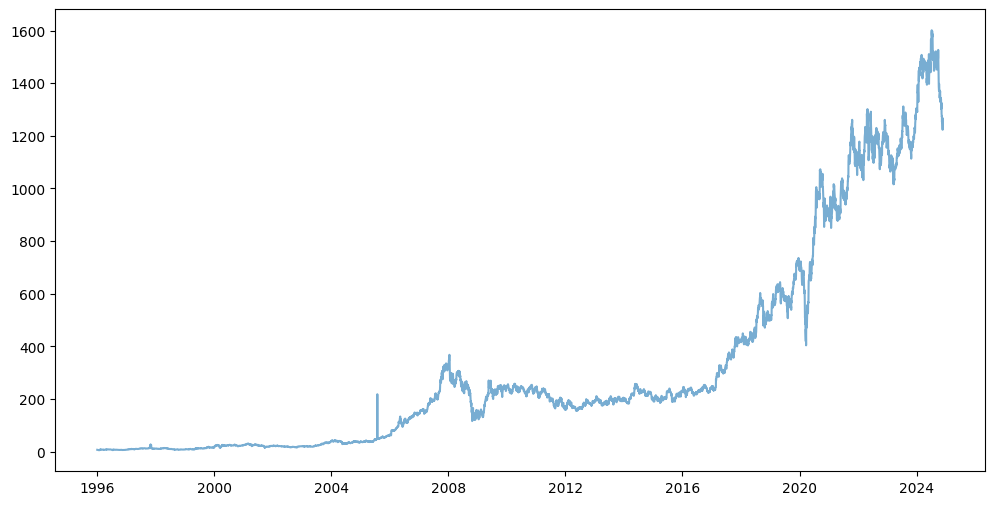

In [8]:

plt.figure(figsize=(12, 6))
data['Rolling_Avg_Close_30'] = data['Close'].rolling(window=30).mean()
data['Rolling_Avg_Volume_30'] = data['Volume'].rolling(window=30).mean()
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.6)
plt.plot(data['Date'], data['Rolling_Avg_Close_30'], label='30-Day Rolling Avg (Close)', linewidth=2)
plt.title('Close Price and 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize trading volume with rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', alpha=0.6, color='orange')
plt.plot(data['Date'], data['Rolling_Avg_Volume_30'], label='30-Day Rolling Avg (Volume)', linewidth=2, color='blue')
plt.title('Trading Volume and 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()
